Shape of TF-IDF matrix: (18846, 10000)
Shape after SVD: (18846, 2)


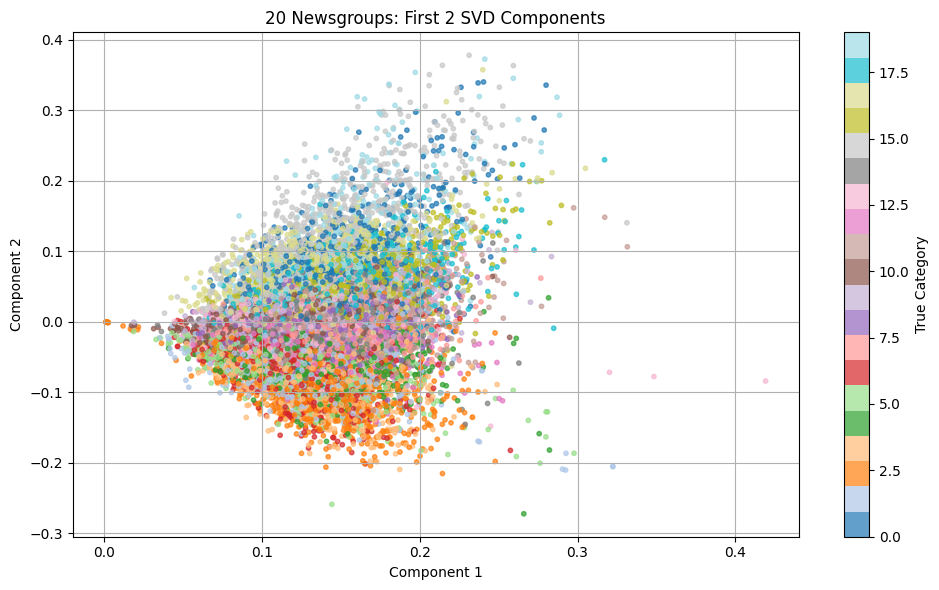

Silhouette Score (k=20): 0.31390316012888225


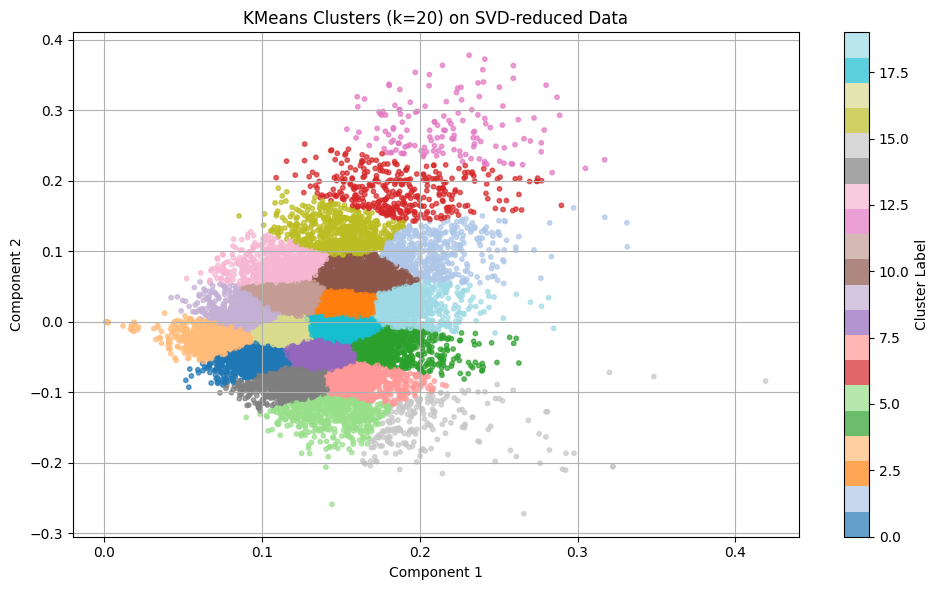

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

newsgroups = fetch_20newsgroups(subset='all')
texts = newsgroups.data
true_labels = newsgroups.target

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = vectorizer.fit_transform(texts)

print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

svd = TruncatedSVD(n_components=2, random_state=42)
reduced_data = svd.fit_transform(tfidf_matrix)

print("Shape after SVD:", reduced_data.shape)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=true_labels, cmap='tab20', s=10, alpha=0.7)
plt.title('20 Newsgroups: First 2 SVD Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='True Category')
plt.grid(True)
plt.tight_layout()
plt.show()

kmeans = KMeans(n_clusters=20, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_data)

sil_score = silhouette_score(reduced_data, cluster_labels)
print("Silhouette Score (k=20):", sil_score)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='tab20', s=10, alpha=0.7)
plt.title('KMeans Clusters (k=20) on SVD-reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.tight_layout()
plt.show()
